<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Demo-of-EDA-Functions" data-toc-modified-id="Demo-of-EDA-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demo of EDA Functions</a></span><ul class="toc-item"><li><span><a href="#DataFrame-Values" data-toc-modified-id="DataFrame-Values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DataFrame Values</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distributions</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li></ul></div>

In [1]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.executable)
print(sys.version)
print(f"Pandas {pd.__version__}")
print(f"Seaborn {sns.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Seaborn 0.11.0


In [3]:
sys.path.append(str(Path.cwd().parent / 'src'))

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [5]:
import src.EDA as EDA

## Load Data

In [6]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                 )

df["target_num"] = np.where(df["target_event"] == "ACTIVE", 1, 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   car_nr                         1000 non-null   float64
 1   ref_dt                         1000 non-null   object 
 2   target_event                   1000 non-null   object 
 3   NUM_CONSEC_SERVICES            1000 non-null   int64  
 4   SUM_INVOICE_AMOUNT_IN_SERVICE  1000 non-null   float64
 5   SUM_INVOICE_AMOUNT             1000 non-null   float64
 6   NUM_EVENTS                     1000 non-null   int64  
 7   FIRST_EVT                      1000 non-null   object 
 8   LAST_EVT                       1000 non-null   object 
 9   LAST_MILEAGE                   1000 non-null   float64
 10  MEAN_MILEAGE_PER_MNTH          1000 non-null   float64
 11  AVG_DIFF_MNTH                  1000 non-null   int64  
 12  age_mnth                       1000 non-null   in

## Demo of EDA Functions 
### DataFrame Values

In [8]:
EDA.display_distinct_values(df)

,#_distinct_values
Column,
car_nr,999
ref_dt,495
target_event,2
NUM_CONSEC_SERVICES,10
SUM_INVOICE_AMOUNT_IN_SERVICE,47
SUM_INVOICE_AMOUNT,714
NUM_EVENTS,37
FIRST_EVT,727
LAST_EVT,544


In [9]:
EDA.display_value_counts_ptc(df[["target_event", "NUM_CONSEC_SERVICES"]], n_rows=3)

,counts,pct
ACTIVE,710,71.0%
CHURN,290,29.0%


,counts,pct
1,384,38.4%
2,255,25.5%
3,181,18.1%


In [10]:
EDA.display_tail_transposed(df, random_state=None)

(1000, 14)


,996,706,905,983,138
car_nr,7.8e+07,2.6e+08,1.4e+07,1.4e+07,2.6e+08
ref_dt,2015-08-05 00:00:00.0000000,2016-05-07 00:00:00.0000000,2017-02-17 00:00:00.0000000,2016-09-30 00:00:00.0000000,2016-04-06 00:00:00.0000000
target_event,ACTIVE,ACTIVE,CHURN,ACTIVE,ACTIVE
NUM_CONSEC_SERVICES,1,1,2,3,1
SUM_INVOICE_AMOUNT_IN_SERVICE,0,0,0,0,0
SUM_INVOICE_AMOUNT,0,2.1e+03,1e+03,1e+02,8.3e+02
NUM_EVENTS,4,6,17,14,6
FIRST_EVT,2012-01-17 00:00:00.0000000,2014-04-30 00:00:00.0000000,2011-04-07 00:00:00.0000000,2009-07-14 00:00:00.0000000,2014-04-30 00:00:00.0000000
LAST_EVT,2014-01-14 00:00:00.0000000,2015-07-21 00:00:00.0000000,2016-11-12 00:00:00.0000000,2015-02-09 00:00:00.0000000,2016-03-15 00:00:00.0000000
LAST_MILEAGE,1.7e+04,3.1e+04,5.8e+04,7e+04,4.3e+04


### Distributions

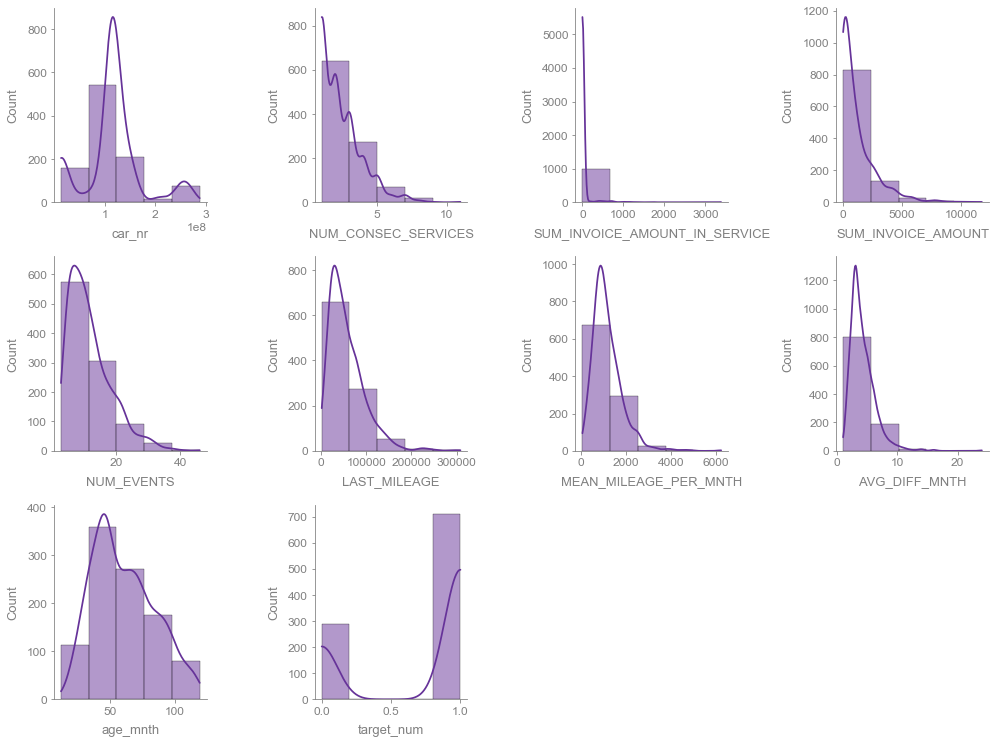

In [11]:
EDA.plot_numeric_histograms(df, bins=5, kde=True)

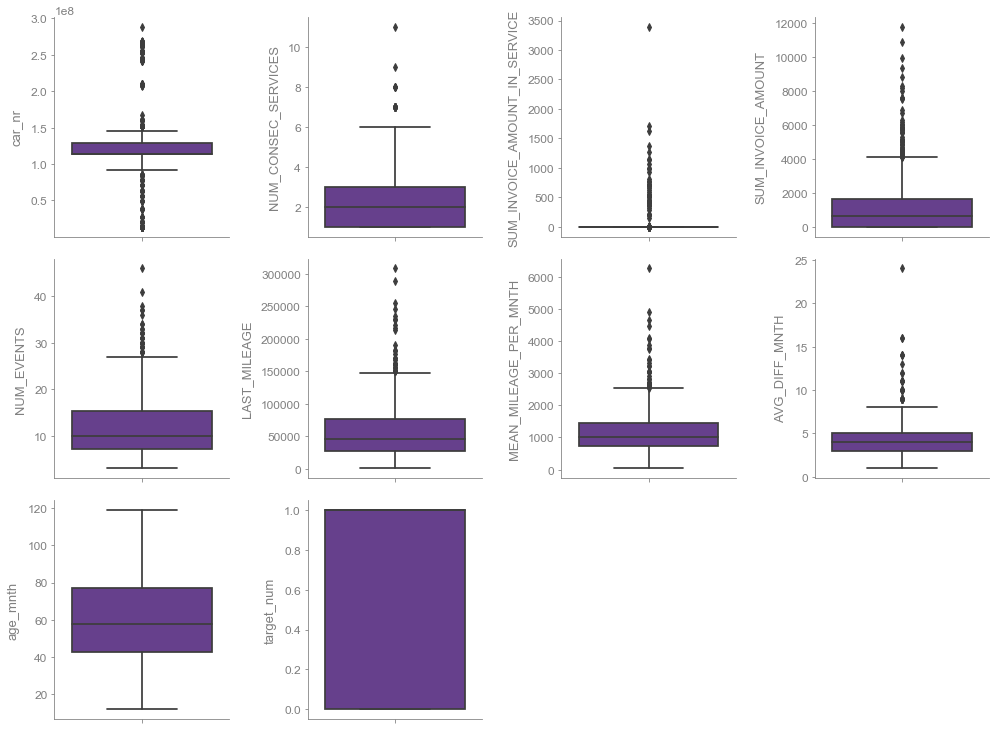

In [12]:
EDA.plot_numeric_boxplots(df)

In [13]:
# Make some columns categorical
df_cat = df.copy()
for col in ["NUM_CONSEC_SERVICES", "target_event", "NUM_EVENTS", "AVG_DIFF_MNTH"]:
    df_cat[col] = df_cat[col].astype("category")

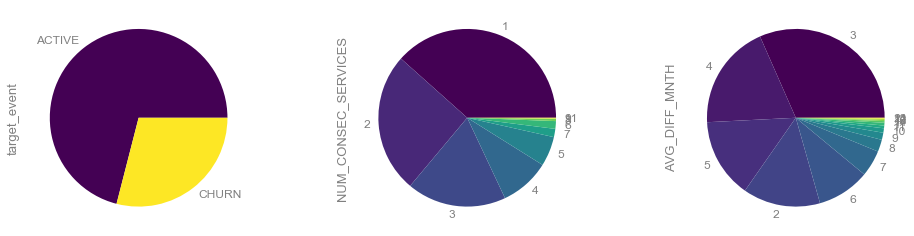

"Not plotted: ['NUM_EVENTS']"

In [14]:
EDA.plot_categorical_pies(df_cat)

### Correlations

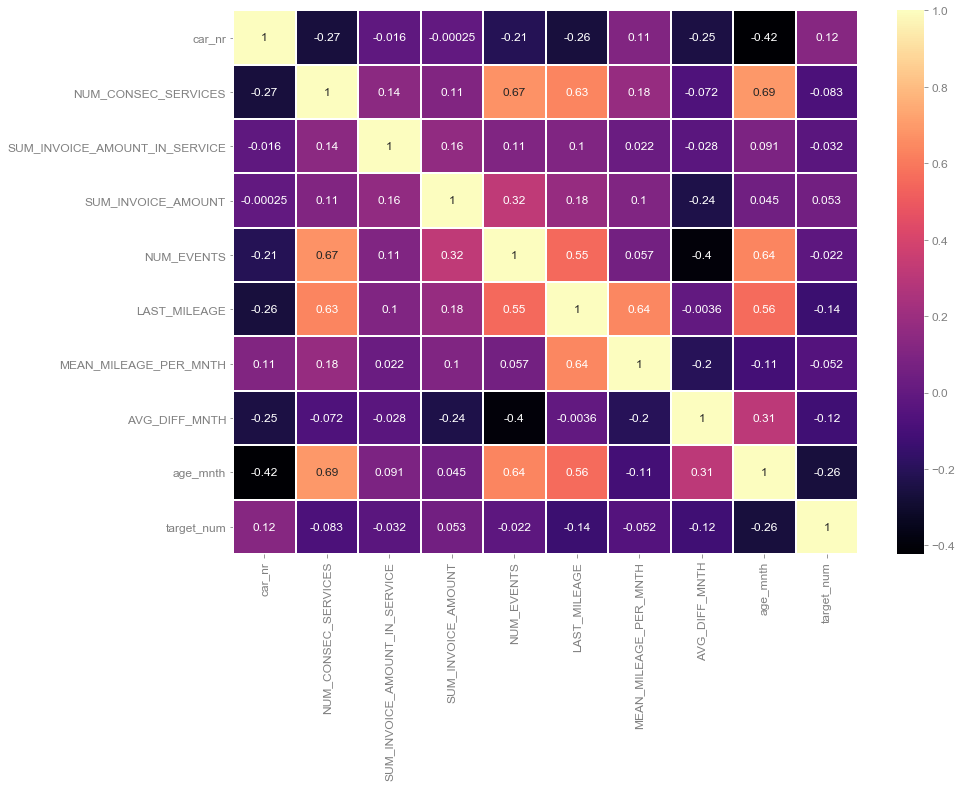

In [15]:
EDA.plot_correlations_full_heatmap(df)

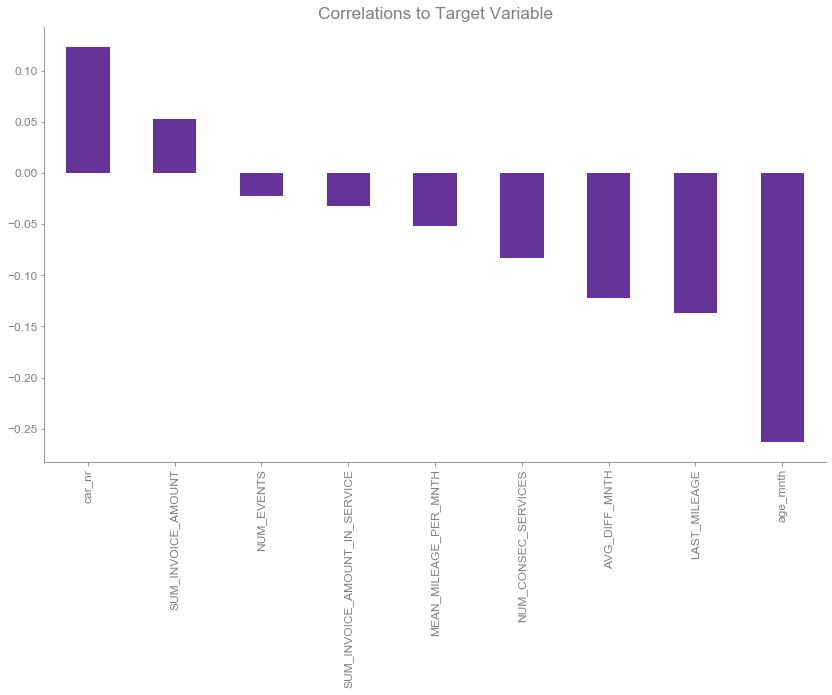

In [16]:
EDA.plot_correlations_numeric_to_target_barchart(df, "target_num")

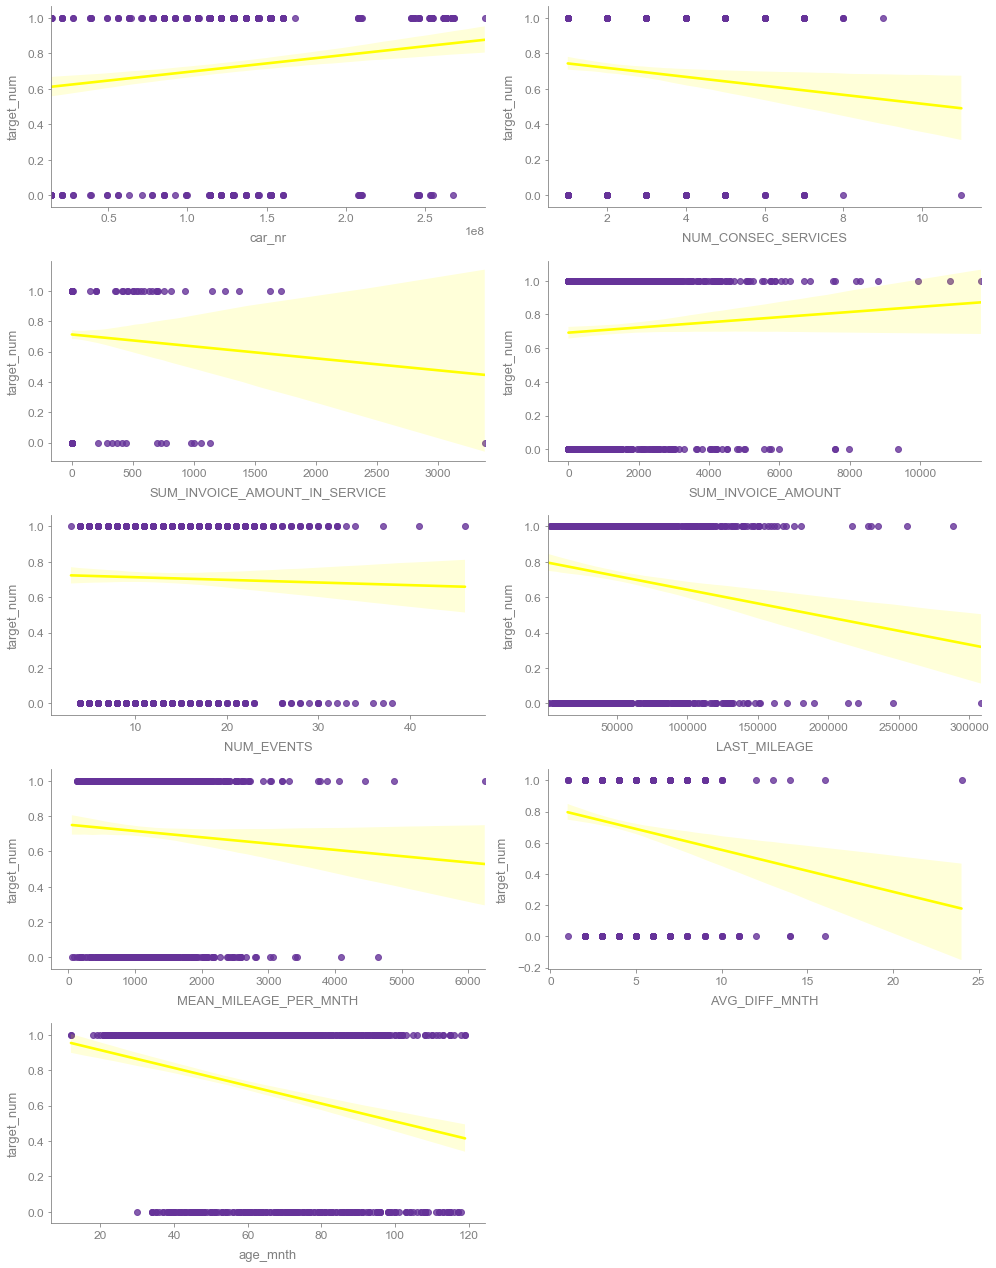

In [17]:
EDA.plot_correlations_numeric_to_target_regressions(df, "target_num")

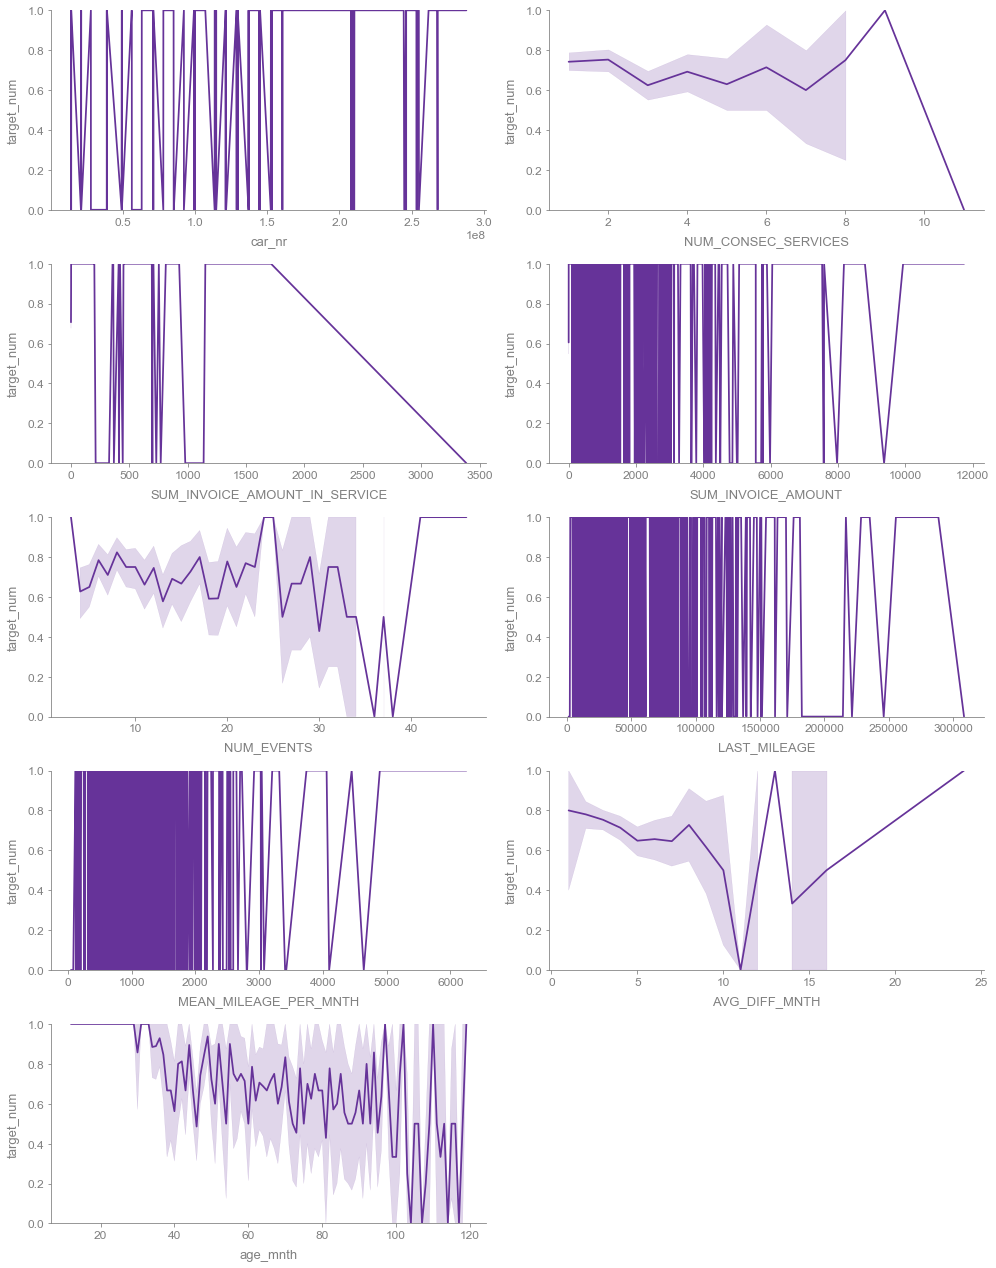

In [18]:
EDA.plot_correlations_numeric_to_target_lineplots(df, "target_num", ylim=(0, 1))

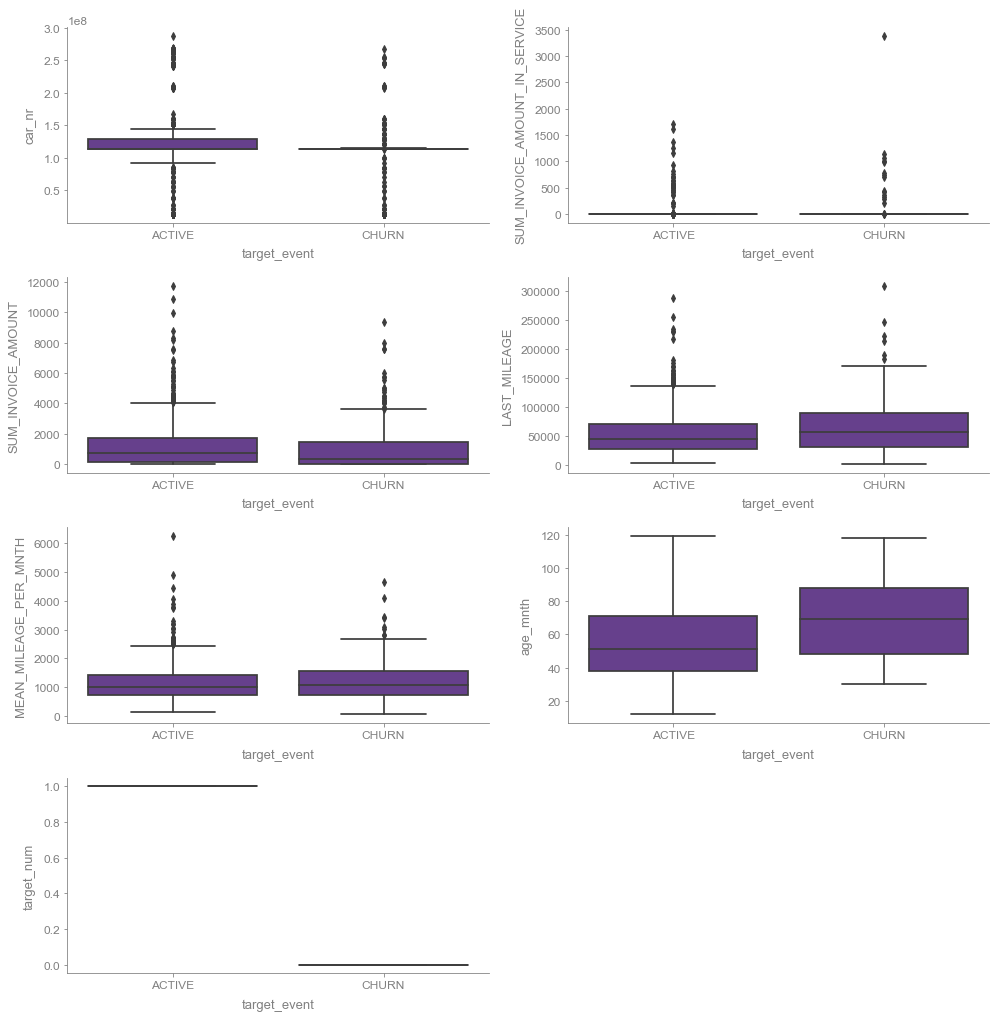

In [19]:
EDA.plot_correlations_numeric_to_target_boxplots(df_cat, "target_event")

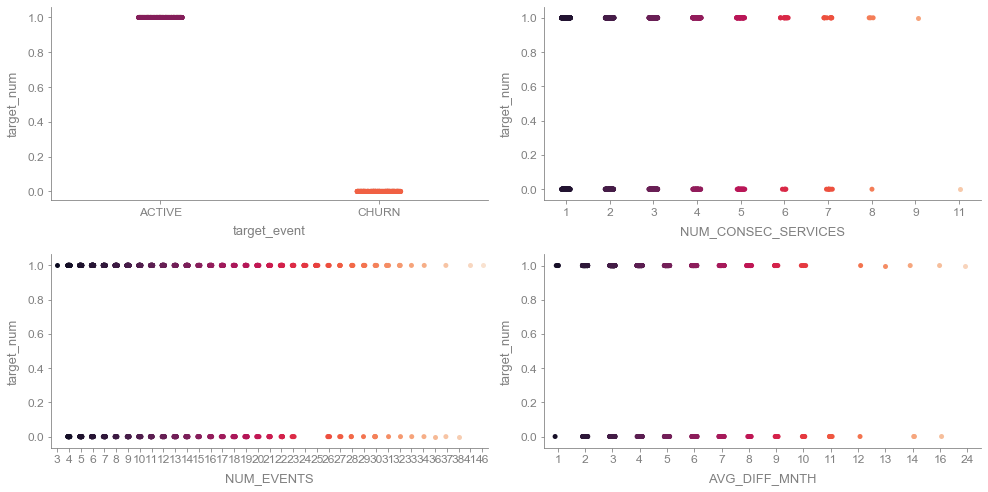

In [20]:
EDA.plot_correlations_categorical_to_target_stripplots(df_cat, "target_num")

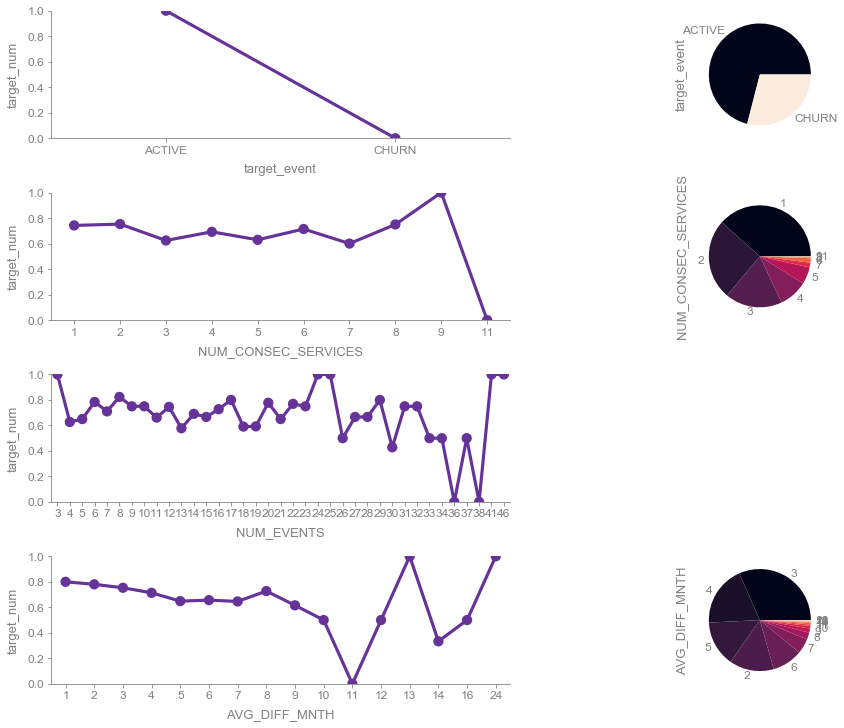

In [21]:
EDA.plot_correlations_numeric_to_target_pointplots_with_pies(df_cat, "target_num")

---